In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler   
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0") 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")
# device = torch.device("cpu")

Running on the GPU


In [3]:
df = pd.read_csv('batman_logo_dataset.csv').sample(frac=1).astype(int)
df.columns

Index(['x', 'y', 'val'], dtype='object')

In [4]:
X = df[['x', 'y']].values
Y = df[['val']].values

In [5]:
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(72900, 2)
(72900, 1)


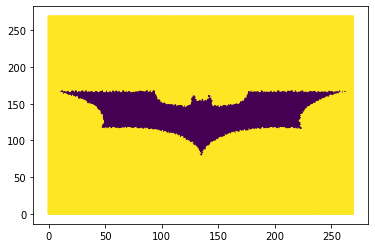

In [6]:
plt.scatter(X[:,0].reshape(X.shape[0], 1), X[:,1].reshape(X.shape[0], 1), c=Y, s=1)

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
X = torch.Tensor(X)
Y = torch.Tensor(Y)
print(X.shape)
print(Y.shape)

torch.Size([72900, 2])
torch.Size([72900, 1])


In [9]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.inp = nn.Linear(2, 256)
        self.mid = nn.Linear(256, 256)
        self.out = nn.Linear(256, 1)
    
    def forward(self, x):
        x = F.relu(self.inp(x))
        x = F.relu(self.mid(x))
        x = F.relu(self.mid(x))
        x = F.relu(self.mid(x))
        x = F.relu(self.mid(x))
        x = F.relu(self.mid(x))
        x = F.relu(self.mid(x))
        x = F.relu(self.mid(x))
        x = self.out(x)
        return x
    
model = Net()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)     
EPOCHS = 100
batch_size = 512
criterion = nn.BCEWithLogitsLoss()

In [10]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = acc * 100
    
    return acc

In [11]:
def train(X, Y, model, EPOCHS, batch_size, criterion, optimizer):
    losses = []
    accuracies = []
    for epoch in range(EPOCHS):
        for i in range(0, X.shape[0], batch_size):
            x , y = X[i:i+batch_size, :], Y[i:i+batch_size, :]
            model.zero_grad()
            optimizer.zero_grad()
            y_hat = model.forward(x.to(device))
            loss = criterion(y_hat,y.to(device))
            loss.backward()
            optimizer.step()
            if i%(batch_size*10) == 0:
                losses.append(loss)
                accuracies.append(binary_acc(y_hat, y.to(device)))
    return model, accuracies, losses

model, accuracies, losses = train(X, Y, model, EPOCHS, batch_size, criterion, optimizer)

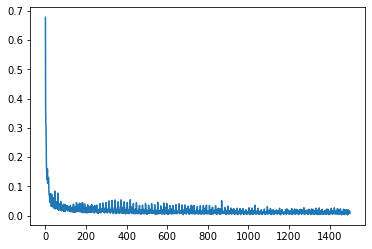

In [12]:
def predict(x):
    #Convert into numpy element to tensor
    x = torch.Tensor(x).to(device)
    #Predict and return ans
    ans = 1/(1+np.exp(-model.forward(x).cpu().detach().numpy()))
    return ans
plt.plot(losses)

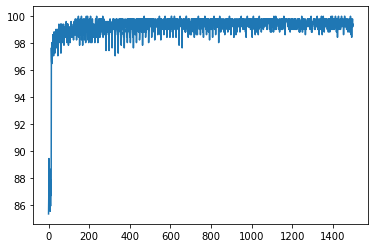

In [13]:
plt.plot(accuracies)

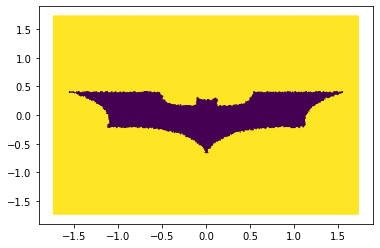

In [14]:
def plot():
    
    Y = predict(X)
    Y = np.round(Y)
    plt.scatter(X[:,0].detach().numpy().reshape(X.shape[0], 1), X[:,1].detach().numpy().reshape(X.shape[0], 1), c=Y, s=1)
plot()